Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: |  Advanced Machine Learning and Deep Learning
2st Semester | AY 2024-2025
**ACTIVITY NO. 7** | **Performing_Face_Recognition**
**Name** | Detchosa, Ralph Christian D.
**Section** | CPE32S3
**Date Performed**: | 02/21/2025
**Date Submitted**: | 02/21/2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

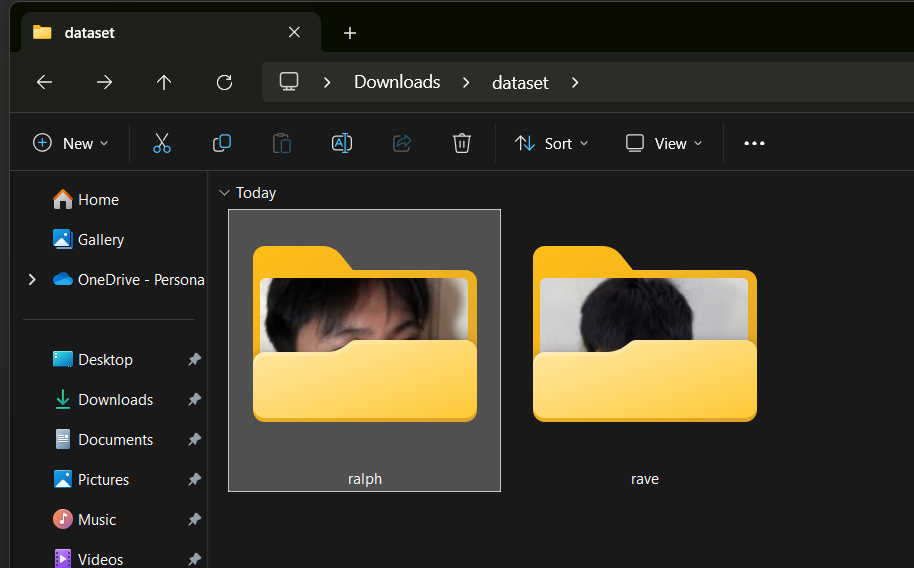

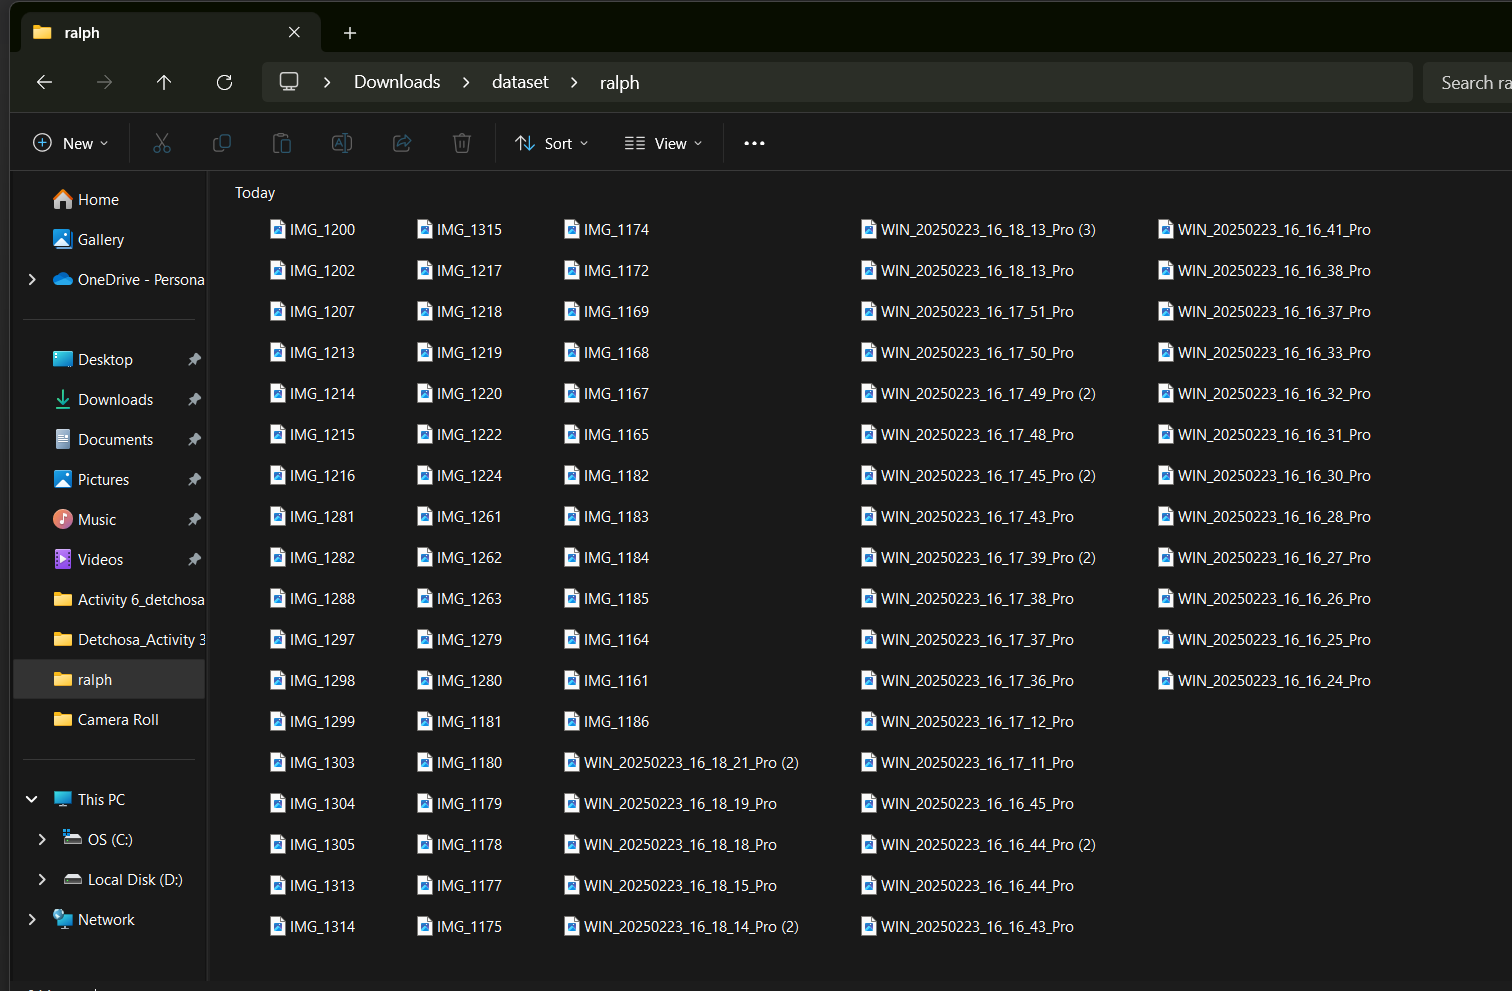

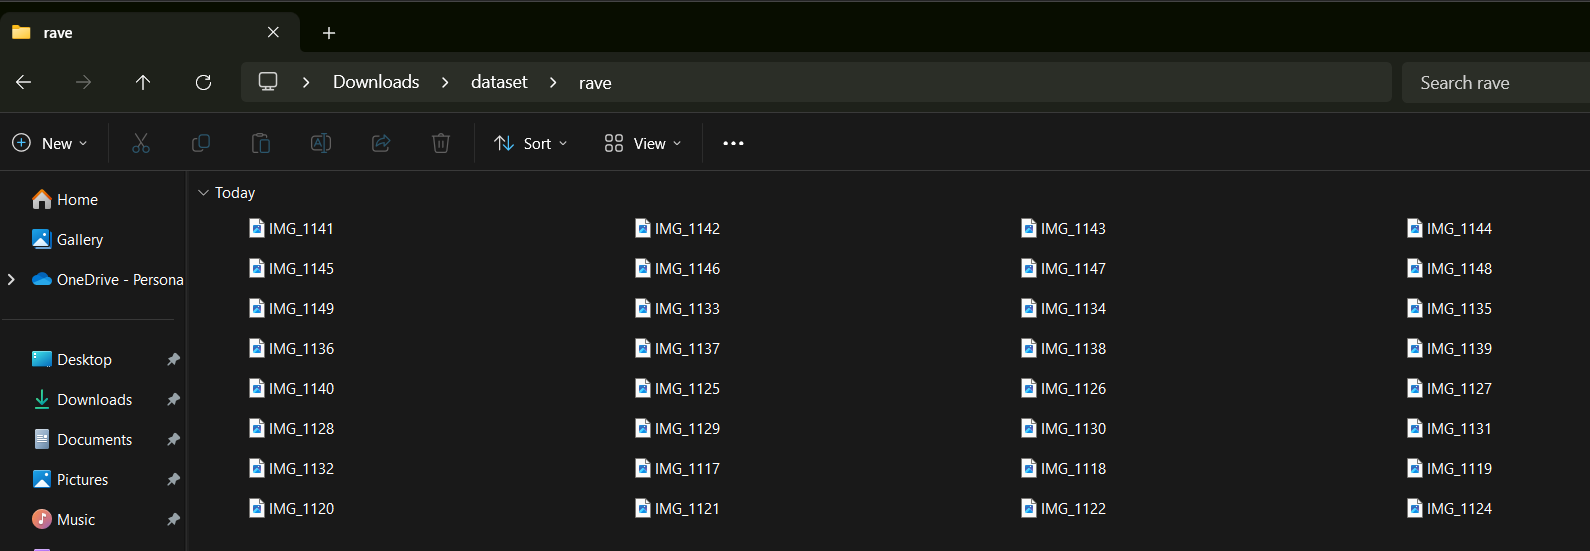

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [42]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

dataset = read_images(r"C:\Users\qwvan\Downloads\dataset")
print(dataset)

[[array([[168, 160, 168, ..., 196, 196, 196],
       [175, 165, 173, ..., 197, 198, 199],
       [183, 169, 172, ..., 198, 200, 202],
       ...,
       [120, 118, 119, ..., 174, 174, 176],
       [122, 120, 122, ..., 173, 172, 173],
       [121, 120, 121, ..., 171, 170, 171]], dtype=uint8), array([[232, 232, 233, ..., 201, 197, 197],
       [232, 232, 233, ..., 209, 206, 205],
       [232, 232, 232, ..., 211, 206, 202],
       ...,
       [147, 149, 151, ...,   9,  11,  13],
       [146, 147, 148, ...,   4,   6,   6],
       [148, 147, 145, ...,   4,   6,   6]], dtype=uint8), array([[188, 187, 196, ..., 187, 186, 185],
       [186, 189, 201, ..., 183, 180, 178],
       [191, 193, 207, ..., 189, 187, 184],
       ...,
       [149, 150, 151, ...,  21,  23,  29],
       [149, 150, 150, ...,  11,  16,  20],
       [153, 154, 153, ...,  19,  16,   3]], dtype=uint8), array([[142, 143, 148, ..., 192, 193, 192],
       [145, 145, 147, ..., 199, 199, 197],
       [149, 149, 147, ..., 195, 195,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

- error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\face\src\eigen_faces.cpp:62: error: (-5:Bad argument) Empty training data was given. You'll need more than one sample to learn a model. in function 'cv::face::Eigenfaces::train'




---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
def face_rec():
  names = ['rave', 'ralph'] # Put your names here for faces to recognize

  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(r"C:\Users\qwvan\Downloads\Detchosa_Activity_7_Performing_Face_Recognition\dataset", (200, 200))
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r"C:\Users\qwvan\Downloads\haarcascade_frontalface_default.xml")

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()




**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

The sample code provided is to perform face recognition using the Eigenface model. The model is trained using the images and labels read from the dataset. Then detects faces in each frame using the Haar cascade classifier. The error I've encountered is just the dataset path file.

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

- `model = cv2.face.createFisherFaceRecognizer()`

In [4]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

dataset = read_images(r"C:\Users\qwvan\Downloads\dataset")

def face_rec():
  names = ['rave', 'ralph'] # Put your names here for faces to recognize

  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(r"C:\Users\qwvan\Downloads\Detchosa_Activity_7_Performing_Face_Recognition\dataset", (200, 200))
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.FisherFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r"C:\Users\qwvan\Downloads\haarcascade_frontalface_default.xml")

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


- model = cv2.face.createLBPHFaceRecognizer()

In [5]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

dataset = read_images(r"C:\Users\qwvan\Downloads\dataset")

def face_rec():
  names = ['rave', 'ralph'] # Put your names here for faces to recognize

  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(r"C:\Users\qwvan\Downloads\Detchosa_Activity_7_Performing_Face_Recognition\dataset", (200, 200))
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.LBPHFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r"C:\Users\qwvan\Downloads\haarcascade_frontalface_default.xml")

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

The first returned value is the Label corresponding to to the index. Second element is the confidence score. It measures how confidet the model about the prediction. Bascially an accuracy score. A lower confidence score indicates a higher confidence in the prediction. These elements are important to identify the label and to measure the confidence level and modify to achieve a desired output.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [120]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

dataset = read_images(r"C:\Users\qwvan\Downloads\dataset")

def face_rec(model):
  names = ['rave','ralph'] # Put your names here for faces to recognize

  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(r"C:\Users\qwvan\Downloads\Detchosa_Activity_7_Performing_Face_Recognition\dataset", (200, 200))
  y = np.asarray(y, dtype=np.int32)

  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r"C:\Users\qwvan\Downloads\haarcascade_frontalface_default.xml")

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        if label == 'ralph':
            cv2.putText(img, 'Known Person', 
                        (x - 20, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0 ), 2)
        else:
          cv2.putText(img, 'Unknown Person', (x - 20 , y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()


In [123]:
model_1 = cv2.face.EigenFaceRecognizer_create(num_components=1, threshold=999999)
model_2 = cv2.face.FisherFaceRecognizer_create(num_components=1, threshold=999999)
model_3 = cv2.face.LBPHFaceRecognizer_create()

In [126]:
face_rec(model_1)

In [ ]:
face_rec(model_2)

In [128]:
face_rec(model_3)

if __name__ == "__main__":
  face_rec()

## 5. Summary, Conclusions and Lessons Learned

In this activity, it introduces the face recognition techniques using the OpenCV library. Using my own dataset, and apply three different face recognition algorithms: Eigenface, Fisherface, and LPBH. Then evaluate the performance the model. I have learned the significance of data preparation and the impact of image quality on the performance of face recognition models.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*